# Analyze and Predicting Car Prices Using Machine Learning

## Import and find info about car sales file

In [2]:
import pandas as pd

In [3]:
file = '/Users/rifqyadiyatma/Downloads/car_prices.xlsx'

df = pd.read_excel(file)

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
#Find info about what kind of type in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558799 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
#How many unique value in each columns
df.nunique()

year                34
make                96
model              973
trim              1958
body                86
transmission         2
vin             550322
state               38
condition           41
odometer        172280
color               20
interior            17
seller           14261
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

## Data Cleaning

In [6]:
#Check to see if there is missing value
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65356
vin                 0
state              26
condition       11794
odometer           94
color             749
interior          749
seller             26
mmr                12
sellingprice       12
saledate           38
dtype: int64

In [7]:
#Drop unnecessary column
df.drop(['trim', 'vin', 'seller', 'interior'], axis = 1, inplace = True)

In [8]:
# Missing value after we drop unused columns
df.isnull().sum()

year                0
make            10301
model           10399
body            13195
transmission    65356
state              26
condition       11794
odometer           94
color             749
mmr                12
sellingprice       12
saledate           38
dtype: int64

### Fill missing values

#### Transmission column

In [9]:
df.value_counts('transmission', dropna = False)

transmission
automatic    475937
NaN           65356
manual        17544
Name: count, dtype: int64

In [10]:
df.value_counts('year')

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1988        11
1986        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64

According to this site https://www.autonationmobileservice.com/i/blog/manual-vs-automatic-transmission-shift-know-about/ by 2007, cars with automatic transmission have outsold manual transmission car.

So using this info, we are going to fill missing values in transmission using year column as the condition.

But before we do that, I'm going to drop rows where year is less than 2000 because it's an old car and we are not going to use that

In [11]:
df = df.drop(df[df['year'] < 2000].index)
df.value_counts('year')

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
Name: count, dtype: int64

In [12]:
#See missing value in transmission columns
make_null = df['transmission'].isnull()
make_null

0         False
1         False
2         False
3         False
4         False
          ...  
558832     True
558833    False
558834    False
558835    False
558836    False
Name: transmission, Length: 549304, dtype: bool

In [13]:
#Put rows with missing values in new dataframe
df_null = df[make_null]
df_null

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
35,2014,Buick,Verano,Sedan,NaN,ca,2.0,19531.0,gray,15000.0,9200.0,Tue Jan 06 2015 04:00:00 GMT-0800 (PST)
44,2014,Chevrolet,Cruze,Sedan,NaN,ca,NaN,38261.0,white,11450.0,2000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
89,2014,Chevrolet,Silverado 2500HD,Crew Cab,NaN,ca,36.0,8742.0,white,34000.0,34000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
112,2014,Chevrolet,Cruze,Sedan,NaN,ca,28.0,40393.0,gray,11450.0,11700.0,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
281,2013,Hyundai,Sonata Hybrid,Sedan,NaN,ca,48.0,1111.0,silver,15550.0,15800.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...
558814,2014,Dodge,Charger,Sedan,NaN,va,43.0,20485.0,white,16350.0,16100.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558820,2014,Dodge,Charger,Sedan,NaN,va,42.0,22744.0,white,16250.0,15900.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Sedan,NaN,pa,4.0,66720.0,gray,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558830,2012,Nissan,Sentra,Sedan,NaN,tn,26.0,35858.0,white,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)


now we we are going to fill missing value in transmission column

In [14]:
#Fill missing value using this data frame
df_null

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
35,2014,Buick,Verano,Sedan,NaN,ca,2.0,19531.0,gray,15000.0,9200.0,Tue Jan 06 2015 04:00:00 GMT-0800 (PST)
44,2014,Chevrolet,Cruze,Sedan,NaN,ca,NaN,38261.0,white,11450.0,2000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
89,2014,Chevrolet,Silverado 2500HD,Crew Cab,NaN,ca,36.0,8742.0,white,34000.0,34000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
112,2014,Chevrolet,Cruze,Sedan,NaN,ca,28.0,40393.0,gray,11450.0,11700.0,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
281,2013,Hyundai,Sonata Hybrid,Sedan,NaN,ca,48.0,1111.0,silver,15550.0,15800.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...
558814,2014,Dodge,Charger,Sedan,NaN,va,43.0,20485.0,white,16350.0,16100.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558820,2014,Dodge,Charger,Sedan,NaN,va,42.0,22744.0,white,16250.0,15900.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Sedan,NaN,pa,4.0,66720.0,gray,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558830,2012,Nissan,Sentra,Sedan,NaN,tn,26.0,35858.0,white,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)


In [15]:
#Using for loop to iterate through dataframe
for row in df_null.index:
    #Condition if the row with year value greater than or equal to 2007
    if df_null.loc[row, 'year'] >= 2007:
        df_null.loc[row, 'transmission'] = 'automatic'
    #Condition if year value is less than 2007
    else:
        df_null.loc[row, 'transmission'] = 'manual'
    

In [16]:
df_null

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
35,2014,Buick,Verano,Sedan,automatic,ca,2.0,19531.0,gray,15000.0,9200.0,Tue Jan 06 2015 04:00:00 GMT-0800 (PST)
44,2014,Chevrolet,Cruze,Sedan,automatic,ca,NaN,38261.0,white,11450.0,2000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
89,2014,Chevrolet,Silverado 2500HD,Crew Cab,automatic,ca,36.0,8742.0,white,34000.0,34000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
112,2014,Chevrolet,Cruze,Sedan,automatic,ca,28.0,40393.0,gray,11450.0,11700.0,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
281,2013,Hyundai,Sonata Hybrid,Sedan,automatic,ca,48.0,1111.0,silver,15550.0,15800.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...
558814,2014,Dodge,Charger,Sedan,automatic,va,43.0,20485.0,white,16350.0,16100.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558820,2014,Dodge,Charger,Sedan,automatic,va,42.0,22744.0,white,16250.0,15900.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Sedan,automatic,pa,4.0,66720.0,gray,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558830,2012,Nissan,Sentra,Sedan,automatic,tn,26.0,35858.0,white,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)


Now that we have done filling missing values in transmission, we import it to our main dataframe

In [17]:
df['transmission'] = df['transmission'].fillna(df_null['transmission'])

In [18]:
df.isnull().sum()

year                0
make             9259
model            9357
body            11767
transmission        0
state              26
condition       10975
odometer           84
color             731
mmr                12
sellingprice       12
saledate           38
dtype: int64

We have sucessfully filling missing value in our main dataframe

#### selling price

In [19]:
#Find average selling price
average_price = df['sellingprice'].mean()
#limir average price to two decimal
average_price = round(average_price, 2)
average_price

13825.48

In [20]:
#Assign it to missing value in selling price

df['sellingprice'] = df['sellingprice'].fillna(average_price)

In [21]:
df.isnull().sum()

year                0
make             9259
model            9357
body            11767
transmission        0
state              26
condition       10975
odometer           84
color             731
mmr                12
sellingprice        0
saledate           38
dtype: int64

#### condition

Same as selling price, we are going to use average for condition columns

In [22]:
mean_condition = round(df['condition'].mean())
mean_condition = float(mean_condition)

In [23]:
df['condition'] = df['condition'].fillna(mean_condition)

In [24]:
df.isnull().sum()

year                0
make             9259
model            9357
body            11767
transmission        0
state              26
condition           0
odometer           84
color             731
mmr                12
sellingprice        0
saledate           38
dtype: int64

#### state

To fill missing value in state column, we use mode() function to find mode value in state columns.

In [25]:
mode_state = df['state'].mode()
mode_state

0    fl
Name: state, dtype: object

Now we know in this file, the majority sales happened in fl. So we assign it to all missing value

In [26]:
df['state'] = df['state'].fillna(mode_state[0])

In [27]:
df.isnull().sum()

year                0
make             9259
model            9357
body            11767
transmission        0
state               0
condition           0
odometer           84
color             731
mmr                12
sellingprice        0
saledate           38
dtype: int64

#### mmr or market price

Same as selling price and condition, we use average value of market price

In [28]:
avg_mmr = round(df['mmr'].mean())
avg_mmr = float(avg_mmr)

In [29]:
df['mmr'] = df['mmr'].fillna(avg_mmr)

In [30]:
df.isnull().sum()

year                0
make             9259
model            9357
body            11767
transmission        0
state               0
condition           0
odometer           84
color             731
mmr                 0
sellingprice        0
saledate           38
dtype: int64

In [31]:
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


#### Color

Same as state, we are going to use mode() to fill missing values in color column

In [33]:
df.value_counts('color')

color
black        109662
white        104938
silver        82411
gray          82273
blue          50259
red           42583
—             24607
gold          10698
green         10051
beige          8791
burgundy       8700
brown          6613
orange         2068
purple         1477
off-white      1431
yellow         1263
charcoal        476
turquoise       216
pink             41
lime             15
Name: count, dtype: int64

In [34]:
df = df.drop(df[df['color'] == '—'].index)

In [35]:
#Find mode in color column
color_mode = df['color'].mode()
color_mode

0    black
Name: color, dtype: object

Majority of car's color is black, so we assign it to missing values in color column

In [36]:
df['color'] = df['color'].fillna(color_mode[0])

df.isnull().sum()

year                0
make             9072
model            9159
body            11550
transmission        0
state               0
condition           0
odometer           84
color               0
mmr                 0
sellingprice        0
saledate           37
dtype: int64

#### odometer

For this column, we are going to fill missing value with the average of odometer.

In [37]:
#Find average value for odometer column

odo_avg = round(df['odometer'].mean())
odo_avg = float(odo_avg)
odo_avg

67757.0

In [38]:
#Assign it to all missing values in odometer

df['odometer'] = df['odometer'].fillna(odo_avg)
df.isnull().sum()

year                0
make             9072
model            9159
body            11550
transmission        0
state               0
condition           0
odometer            0
color               0
mmr                 0
sellingprice        0
saledate           37
dtype: int64

### Fix data that's not in correct format

#### Make Column

In [39]:
df.value_counts('make')

make
Ford          82539
Chevrolet     58617
Nissan        50172
Toyota        37701
Dodge         29953
              ...  
mazda tk          1
chev truck        1
Lotus             1
ford tk           1
airstream         1
Name: count, Length: 92, dtype: int64

The result above shows that there are same manufacturer but got divided because some of them are capitalize and some of them are not.

So we need to change it all

In [40]:
# Change all value in make columns to only the first letter is capitalized
df['make'] = df['make'].str.capitalize()

In [41]:
# Change vw to volkswagen
df['make'] = df['make'].replace('Vw', 'Volkswagen')

In [42]:
df.value_counts('make')

make
Ford          82880
Chevrolet     58927
Nissan        50228
Toyota        37778
Dodge         30149
              ...  
Hyundai tk        1
Chev truck        1
Ford tk           1
Mazda tk          1
Lotus             1
Name: count, Length: 61, dtype: int64

In [43]:
# Fix typo name
for row in df.index:
    match df.loc[row, 'make']:
        case 'Hyundai tk':
            df.loc[row, 'make'] = 'Hyundai'
        case 'Mazda tk':
            df.loc[row, 'make'] = 'Mazda'
        case 'Mercedes-b':
            df.loc[row, 'make'] = 'Mercedes-benz'
        case 'Ford tk':
            df.loc[row, 'make'] = 'Ford'

In [44]:
df.value_counts('make')

make
Ford             82881
Chevrolet        58927
Nissan           50228
Toyota           37778
Dodge            30149
Honda            25941
Hyundai          21472
Bmw              19961
Kia              17794
Chrysler         17061
Mercedes-benz    15116
Jeep             14998
Infiniti         14339
Volkswagen       11353
Lexus            11155
Gmc              10428
Mazda             8280
Cadillac          7317
Acura             5699
Audi              5542
Subaru            4921
Buick             4808
Lincoln           4784
Ram               4495
Pontiac           4301
Mitsubishi        4103
Volvo             3571
Mini              3162
Saturn            2663
Land rover        1817
Mercury           1786
Scion             1643
Porsche           1364
Jaguar            1362
Suzuki            1066
Fiat               846
Hummer             792
Saab               456
Smart              386
Oldsmobile         272
Isuzu              154
Maserati           133
Bentley            112
Merced

### Drop rows with missing value

In [45]:
#Delete missing value in rows
df.dropna(axis = 0, inplace = True)

In [46]:
df.isnull().sum()

year            0
make            0
model           0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
mmr             0
sellingprice    0
saledate        0
dtype: int64

We have finished dealing with missing value in our dataset. Next task is data visualization

In [47]:
df.head(10)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,Sedan,automatic,ca,1.0,5554.0,gray,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,Bmw,M5,Sedan,automatic,ca,34.0,14943.0,black,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,Sedan,automatic,ca,2.0,28617.0,black,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,Sedan,automatic,ca,42.0,9557.0,white,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,Convertible,automatic,ca,3.0,4809.0,red,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


### Split saledate column

In [48]:
#Create new dataframe to avoid error in main dataframe
df_test = df.copy()
df_test.head(10)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,Sedan,automatic,ca,1.0,5554.0,gray,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,Bmw,M5,Sedan,automatic,ca,34.0,14943.0,black,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,Sedan,automatic,ca,2.0,28617.0,black,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,Sedan,automatic,ca,42.0,9557.0,white,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,Convertible,automatic,ca,3.0,4809.0,red,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


Because there is no comma in saledate, so we need to split it by space or ' '.
Split it into 4 new columns

In [49]:
#Create new columns and assign it with splitted saledate column
df_test[['Day', 'Month', 'Date', 'Year', 'Time']] = df['saledate'].str.split(' ', n = 4, expand = True)
df_test.head()

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate,Day,Month,Date,Year,Time
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Thu,Jan,15,2015,04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Thu,Jan,29,2015,04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Thu,Dec,18,2014,12:30:00 GMT-0800 (PST)


In [50]:
#Concate or merge Day, month, date, and year columns to new Saledate column
df_test['Saledate'] = df_test['Day'] + ', ' + df_test['Month'] + ' ' + df_test['Date'].astype(str) + ' ' + df_test['Year'].astype(str)

In [51]:
df_test.head(10)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,saledate,Day,Month,Date,Year,Time,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Thu,Jan,15,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Thu,Jan,29,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Thu,Dec,18,2014,12:30:00 GMT-0800 (PST),"Thu, Dec 18 2014"
5,2015,Nissan,Altima,Sedan,automatic,ca,1.0,5554.0,gray,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),Tue,Dec,30,2014,12:00:00 GMT-0800 (PST),"Tue, Dec 30 2014"
6,2014,Bmw,M5,Sedan,automatic,ca,34.0,14943.0,black,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),Wed,Dec,17,2014,12:30:00 GMT-0800 (PST),"Wed, Dec 17 2014"
7,2014,Chevrolet,Cruze,Sedan,automatic,ca,2.0,28617.0,black,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),Tue,Dec,16,2014,13:00:00 GMT-0800 (PST),"Tue, Dec 16 2014"
8,2014,Audi,A4,Sedan,automatic,ca,42.0,9557.0,white,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),Thu,Dec,18,2014,12:00:00 GMT-0800 (PST),"Thu, Dec 18 2014"
9,2014,Chevrolet,Camaro,Convertible,automatic,ca,3.0,4809.0,red,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST),Tue,Jan,20,2015,04:00:00 GMT-0800 (PST),"Tue, Jan 20 2015"


In [52]:
#Drop the old saledate column
df_test.drop(columns = 'saledate', inplace = True)

In [53]:
df_test

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,Day,Month,Date,Year,Time,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu,Jan,15,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu,Jan,29,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu,Dec,18,2014,12:30:00 GMT-0800 (PST),"Thu, Dec 18 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,automatic,in,45.0,18255.0,silver,35300.0,33000.0,Thu,Jul,09,2015,07:00:00 GMT-0700 (PDT),"Thu, Jul 09 2015"
558833,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,30200.0,30800.0,Wed,Jul,08,2015,09:30:00 GMT-0700 (PDT),"Wed, Jul 08 2015"
558834,2012,Bmw,X5,SUV,automatic,ca,48.0,50561.0,black,29800.0,34000.0,Wed,Jul,08,2015,09:30:00 GMT-0700 (PDT),"Wed, Jul 08 2015"
558835,2015,Nissan,Altima,sedan,automatic,ga,38.0,16658.0,white,15100.0,11100.0,Thu,Jul,09,2015,06:45:00 GMT-0700 (PDT),"Thu, Jul 09 2015"


In [54]:
#Change Year name column
df_test.rename(columns = {'Year': 'SaleYear'}, inplace = True)
df_test.head()

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,Day,Month,Date,SaleYear,Time,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue,Dec,16,2014,12:30:00 GMT-0800 (PST),"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu,Jan,15,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu,Jan,29,2015,04:30:00 GMT-0800 (PST),"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu,Dec,18,2014,12:30:00 GMT-0800 (PST),"Thu, Dec 18 2014"


In [55]:
#Drop Day, date, and time columns because we do not need them
df_test.drop(columns = ['Day', 'Date', 'Time'], inplace = True)
df_test.head()

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,Month,SaleYear,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Jan,2015,"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Jan,2015,"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Dec,2014,"Thu, Dec 18 2014"


After check the test and there is no problem, we could copy the test dataframe to our main dataframe

In [56]:
df = df_test.copy()
df.head(100)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,Month,SaleYear,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Jan,2015,"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Jan,2015,"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Dec,2014,"Thu, Dec 18 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2014,Chevrolet,Cruze,Sedan,automatic,ca,2.0,8154.0,silver,14150.0,10000.0,Dec,2014,"Thu, Dec 18 2014"
97,2014,Chevrolet,Silverado 1500,Crew Cab,automatic,ca,37.0,6726.0,black,26900.0,30250.0,Dec,2014,"Wed, Dec 17 2014"
98,2014,Chevrolet,Cruze,Sedan,automatic,ca,37.0,36771.0,silver,13000.0,13600.0,Dec,2014,"Wed, Dec 17 2014"
99,2015,Kia,Sorento,SUV,automatic,ca,49.0,9552.0,burgundy,20800.0,21000.0,Dec,2014,"Tue, Dec 16 2014"


In [57]:
df.rename(columns = {'Month': 'SaleMonth'}, inplace = True)

## Data Visualisation

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537401 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          537401 non-null  int64  
 1   make          537401 non-null  object 
 2   model         537401 non-null  object 
 3   body          537401 non-null  object 
 4   transmission  537401 non-null  object 
 5   state         537401 non-null  object 
 6   condition     537401 non-null  float64
 7   odometer      537401 non-null  float64
 8   color         537401 non-null  object 
 9   mmr           537401 non-null  float64
 10  sellingprice  537401 non-null  float64
 11  SaleMonth     537401 non-null  object 
 12  SaleYear      537401 non-null  object 
 13  Saledate      537401 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 61.5+ MB


In [56]:
#Find top 10 most expensive cars
df.sort_values(by = ['sellingprice'], ascending = False).head(10)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,SaleMonth,SaleYear,Saledate
344905,2014,Ford,Escape,SUV,automatic,mo,43.0,27802.0,green,22800.0,230000.0,Feb,2015,"Wed, Feb 25 2015"
548169,2011,Ferrari,458 Italia,coupe,automatic,fl,46.0,12116.0,red,182000.0,183000.0,Jun,2015,"Wed, Jun 17 2015"
446949,2015,Mercedes-benz,S-Class,Sedan,automatic,ca,41.0,5277.0,white,170000.0,173000.0,May,2015,"Thu, May 21 2015"
545523,2013,Rolls-royce,Ghost,sedan,automatic,fl,42.0,7852.0,white,178000.0,171500.0,Jun,2015,"Wed, Jun 17 2015"
125095,2012,Rolls-royce,Ghost,Sedan,automatic,fl,45.0,14316.0,black,154000.0,169500.0,Jan,2015,"Wed, Jan 14 2015"
557570,2012,Rolls-royce,Ghost,sedan,automatic,ca,36.0,11832.0,white,164000.0,169000.0,Jun,2015,"Thu, Jun 18 2015"
538347,2012,Rolls-royce,Ghost,sedan,automatic,ca,44.0,5215.0,white,166000.0,167000.0,Jun,2015,"Thu, Jun 18 2015"
283534,2014,Bmw,i8,Coupe,automatic,fl,5.0,154.0,white,170000.0,165000.0,Feb,2015,"Tue, Feb 10 2015"
146917,2014,Bmw,i8,Coupe,automatic,ca,5.0,60.0,white,176000.0,165000.0,Jan,2015,"Thu, Jan 15 2015"
299198,2013,Bentley,Continental GTC,Convertible,automatic,fl,44.0,2968.0,black,152000.0,163000.0,Feb,2015,"Thu, Feb 12 2015"


### Year with the highest number of manufactured cars

In [57]:
#Create a list containing top 10 highest number of manufactured cars
list_year = df['year'].value_counts().index[0:10]

In [58]:
#import library for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns


Text(0, 0.5, 'Total')

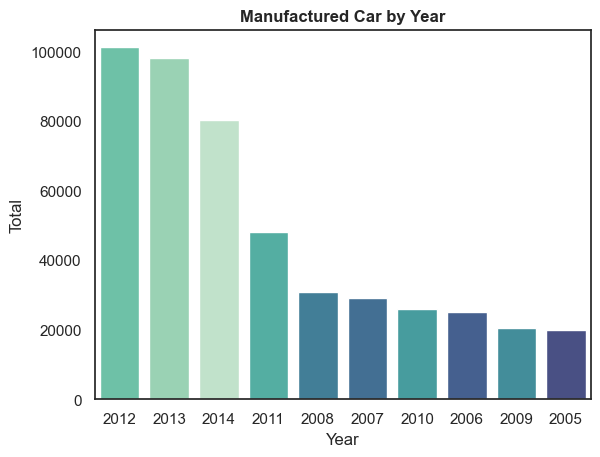

In [60]:
#Create a plot
sns.countplot(data = df, x = 'year', order = list_year, hue = 'year', palette = 'mako', legend = False)
# sns.color_palette("mako", as_cmap=True)
sns.set(style = 'white')
plt.title('Manufactured Car by Year', fontsize = 12, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Total')

### Manual vs Automatic

In [61]:
df['transmission'].value_counts()

transmission
automatic    511167
manual        26234
Name: count, dtype: int64

Text(0, 0.5, 'Transmission')

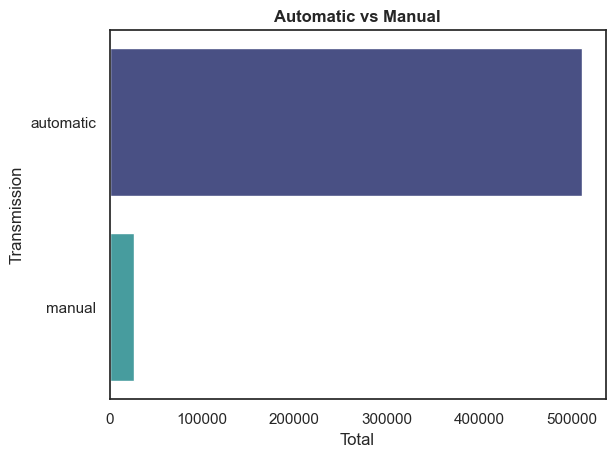

In [62]:
#Create a plot
sns.countplot(data = df, y = 'transmission', hue = 'transmission', palette = 'mako', legend = False)
sns.set(style = 'white')
plt.title('Automatic vs Manual', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total')
plt.ylabel('Transmission')

### Top 10 Car Brands

Text(0, 0.5, 'Total')

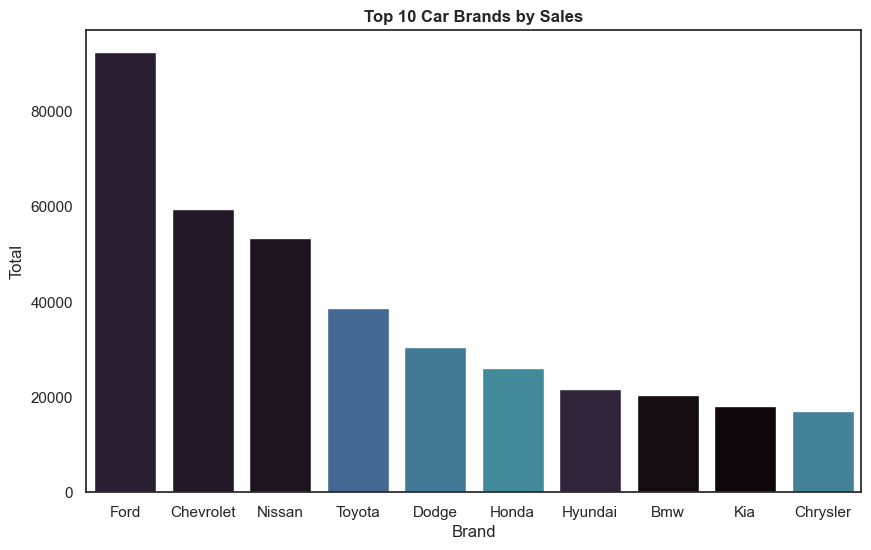

In [63]:
#Create a list consisting brand with the most sales
brand_list = df['make'].value_counts().index[0:10]

#Create a plot
# sns.color_palette("crest", as_cmap=True)
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'make', order = brand_list, hue = 'make', palette = 'mako', legend = False)
sns.set_style(style = 'dark')
plt.title('Top 10 Car Brands by Sales', fontsize = 12, fontweight = 'bold')
plt.xlabel('Brand')
plt.ylabel('Total')

### Sales Through The Year

In [183]:
df['SaleYear'].value_counts()

SaleYear
2015    486871
2014     50530
Name: count, dtype: int64

Text(0, 0.5, 'Total')

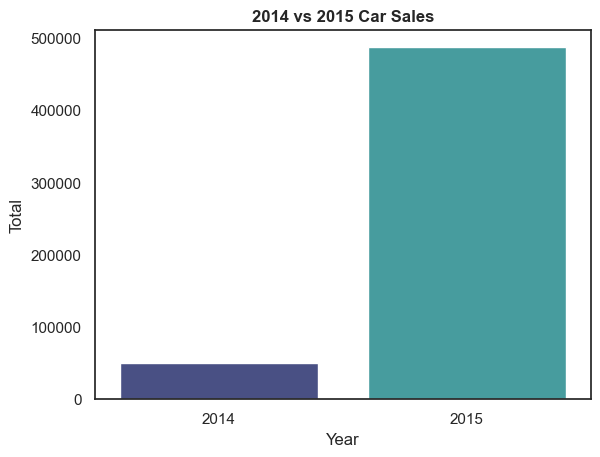

In [217]:
sns.countplot(x = 'SaleYear', data = df, hue = 'SaleYear', palette = 'mako', legend = False)
sns.set_style(style = 'dark')
plt.title('2014 vs 2015 Car Sales', fontsize = 12, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Total')

### Total Sales by Month

Text(0, 0.5, 'Total')

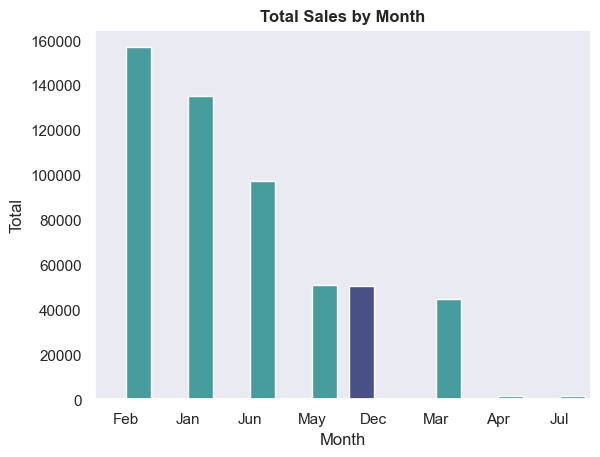

In [194]:
month = df['SaleMonth'].value_counts().index[0:12]

sns.countplot(x = 'SaleMonth', data = df, order = month, hue = 'SaleYear', palette = 'mako', legend = False)
sns.set_style(style = 'dark')
plt.title('Total Sales by Month', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Total')

## Price Prediction

In [64]:
df.head(10)

,year,make,model,body,transmission,state,condition,odometer,color,mmr,sellingprice,SaleMonth,SaleYear,Saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Dec,2014,"Tue, Dec 16 2014"
2,2014,Bmw,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Jan,2015,"Thu, Jan 15 2015"
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Jan,2015,"Thu, Jan 29 2015"
4,2014,Bmw,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Dec,2014,"Thu, Dec 18 2014"
5,2015,Nissan,Altima,Sedan,automatic,ca,1.0,5554.0,gray,15350.0,10900.0,Dec,2014,"Tue, Dec 30 2014"
6,2014,Bmw,M5,Sedan,automatic,ca,34.0,14943.0,black,69000.0,65000.0,Dec,2014,"Wed, Dec 17 2014"
7,2014,Chevrolet,Cruze,Sedan,automatic,ca,2.0,28617.0,black,11900.0,9800.0,Dec,2014,"Tue, Dec 16 2014"
8,2014,Audi,A4,Sedan,automatic,ca,42.0,9557.0,white,32100.0,32250.0,Dec,2014,"Thu, Dec 18 2014"
9,2014,Chevrolet,Camaro,Convertible,automatic,ca,3.0,4809.0,red,26300.0,17500.0,Jan,2015,"Tue, Jan 20 2015"


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [59]:
#Feature or predictor and assign it to X
features = ['year', 'make', 'transmission', 'condition', 'odometer']

#Target to predict
y = df.sellingprice
X = df[features]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [60]:
X_train.head()

,year,make,transmission,condition,odometer
374967,2010,Toyota,automatic,21.0,175103.0
25707,2003,Chrysler,automatic,31.0,167196.0
143219,2007,Pontiac,automatic,27.0,217359.0
63327,2012,Nissan,automatic,26.0,41526.0
318866,2012,Toyota,automatic,42.0,47585.0


In [62]:
#Create a function to measure the model accuracy 
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return r2_score(y_valid, preds)

### Without Object Columns

My first approach to predict car prices is to exclude columns with object value such as transmission and make columns

In [63]:
#Measure accuracy without object variable on X
X_train_drop = X_train.select_dtypes(exclude = 'object')
X_valid_drop = X_valid.select_dtypes(exclude = 'object')

print("R2 from Approach 1 (Drop categorical variables):")
print(score_dataset(X_train_drop, X_valid_drop, y_train, y_valid))

R2 from Approach 1 (Drop categorical variables):
0.2954234796361467


The R2 score using first approach is bad because the R2 value is close to zero 

### With Object Columns

#### Ordinal Encoding

The second approach to predict car prices is include object columns using Ordinal Encoder

Ordinal encoding assigns each unique value to a different integer. -Kaggle

In [64]:
#Make a list for columns that contains categorical variables
obj = (X_train.dtypes == 'object')
obj_cols = list(obj[obj].index)
obj_cols

['make', 'transmission']

In [65]:
#Using Ordinal Encoder to use object cols for prediction
from sklearn.preprocessing import OrdinalEncoder

#Copy X_train and valid to avoid error in original data
X_train_label = X_train.copy()
X_valid_label = X_valid.copy()

ordinalEncoder = OrdinalEncoder()
#Apply ordinal encoder to each object columns
X_train_label[obj_cols] = ordinalEncoder.fit_transform(X_train[obj_cols])
X_valid_label[obj_cols] = ordinalEncoder.transform(X_valid[obj_cols])

#Measure accuracy using R2
print('R2 score using Ordinal Encoder:')
print(score_dataset(X_train_label, X_valid_label, y_train, y_valid))

R2 score using Ordinal Encoder:
0.6378033231263038


Using Ordinal Encoder to use object values as features for prediction have a better result than only using numeric values. This shows by the R2 score that imporves significantly from 0.29 to 0.63

#### One-Hot Encoding

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

Example:


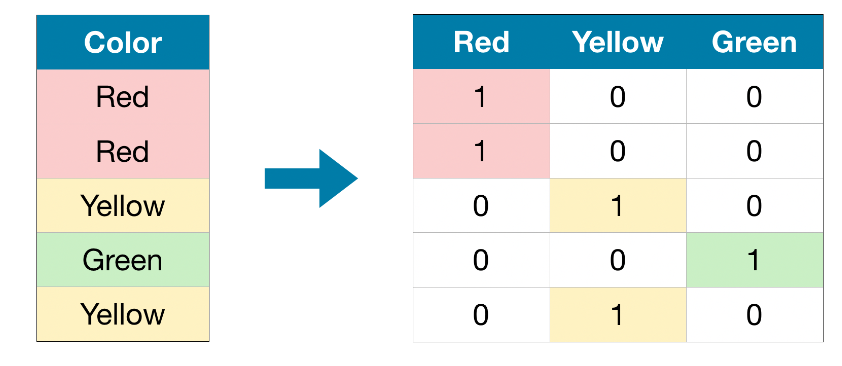

In the original dataset, "Color" is a categorical variable with three categories: "Red", "Yellow", and "Green". The corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset. Wherever the original value was "Red", we put a 1 in the "Red" column; if the original value was "Yellow", we put a 1 in the "Yellow" column, and so on.

Source: Kaggle

In [68]:
#Import Onehot encoder library
from sklearn.preprocessing import OneHotEncoder

#Set handle_unkown = ignore to avoid errors when validation data contains classes that are not in train data
#Set sparse = False to ensure encoded columns are return as anumpy array 
OneHotEnc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

#Apply OneHot Encoder to each columns with object values
OneHotTrain = pd.DataFrame(OneHotEnc.fit_transform(X_train[obj_cols]))
OneHotVal = pd.DataFrame(OneHotEnc.transform(X_valid[obj_cols]))

#OneHotEncoder removed index so we need to put it back
OneHotTrain.index = X_train.index
OneHotVal.index = X_valid.index

#Create new dataframe that consist only numerical variable
num_train = X_train.drop(obj_cols, axis = 1)
num_valid = X_valid.drop(obj_cols, axis = 1)

#Concatenate OneHotEncoded columns with numerical columns
OneHotX_train = pd.concat([OneHotTrain, num_train], axis = 1)
OneHotX_valid = pd.concat([OneHotVal, num_valid], axis = 1)

#Ensure columns have string type
OneHotX_train.columns = OneHotX_train.columns.astype(str)
OneHotX_valid.columns = OneHotX_valid.columns.astype(str)

print('R2 score using One-Hot Encoder:')
print(score_dataset(OneHotX_train, OneHotX_valid, y_train, y_valid))

R2 score using One-Hot Encoder:
0.6483993490241935


One-Hot Encoding approach is slightly better than Ordinal Encoder. The R2 Score improved from 0.63 to 0.64.

This means using One-Hot Encoding is the best approach than using only numerical value or ordinal encoder. This is proven by a higher R2 scores which is 0.64 or 64%